In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,5

In [3]:
df_region = pd.read_csv('WorldPopulation.csv', sep= ';')
population = df_region.groupby('region').agg({'value' : 'sum'})
population

,value
region,
Africa,1060491021
Americas,958306818
Asia,4174984067
Europe,732609380
Oceania,37803967


<AxesSubplot:title={'center':'Распределение населения по регионам'}, xlabel='Регион', ylabel='Население, млрд. чел.'>

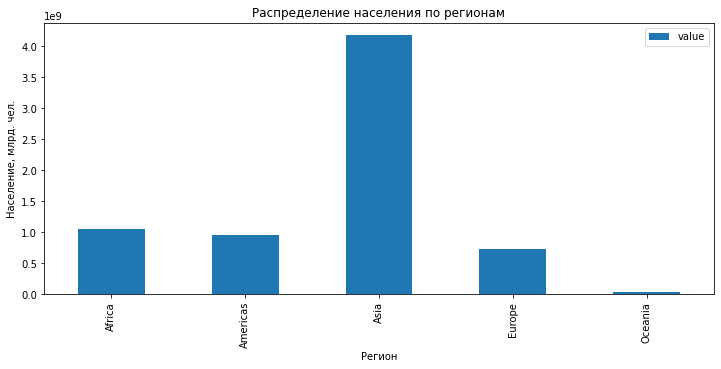

In [4]:
population.plot(kind='bar', title='Распределение населения по регионам', xlabel = 'Регион', ylabel = 'Население, млрд. чел.')лизация 
#Простая визуализация распределения населения по регионам мира

Датасет по вину
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

In [5]:
df_wine = pd.read_csv('winequalityN.csv', sep= ',')
df_wine.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


<AxesSubplot:xlabel='quality'>

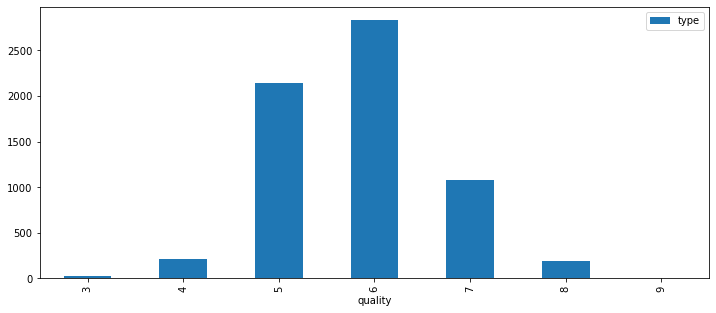

In [6]:
wine_q = df_wine.groupby('quality').agg({'type': 'count'})
wine_q.plot(kind='bar', stacked=False)

В представленой выборке значительную часть занимает "хорошее" вино с оценками "5","6","7". Поэтому далее буду строить визуализации для этих категорий

In [8]:
# Определяю характеристики для красного и белого вина:алкоголь, кислотность, остаточный сахар
red_wine = df_wine[df_wine['type'] == 'red'].groupby('quality').agg({ 'alcohol' : 'mean', 'fixed acidity':'mean', 'residual sugar':'mean'}).iloc[2:5]
white_wine = df_wine[df_wine['type'] == 'white'].groupby('quality').agg({ 'alcohol' : 'mean', 'fixed acidity':'mean', 'residual sugar':'mean'}).iloc[2:5]

In [9]:
red_wine

,alcohol,fixed acidity,residual sugar
quality,,,
5,9.899706,8.170294,2.528855
6,10.629519,8.349922,2.477194
7,11.465913,8.872362,2.720603


In [10]:
white_wine

,alcohol,fixed acidity,residual sugar
quality,,,
5,9.808840,6.935788,7.334969
6,10.575372,6.837950,6.443855
7,11.367936,6.734716,5.189761


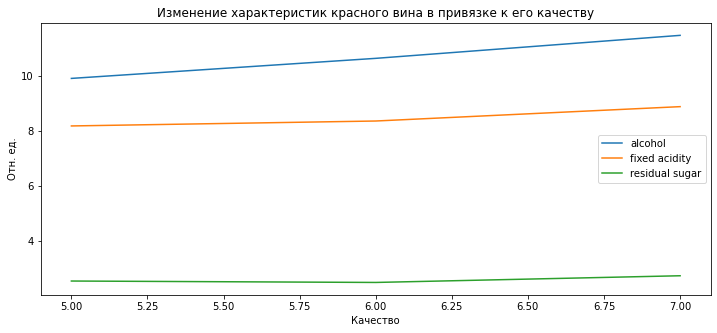

In [15]:
for attr in red_wine.columns:
    plt.plot(red_wine.index, red_wine[attr])
plt.title('Изменение характеристик красного вина в привязке к его качеству')
plt.xlabel('Качество')
plt.ylabel('Отн. ед.') 
plt.legend(red_wine)


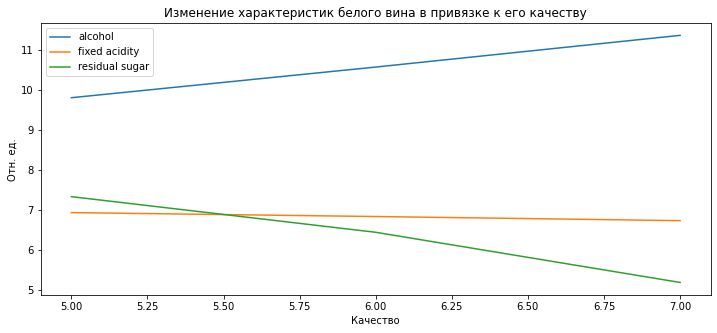

In [13]:
for attr in white_wine.columns:
    plt.plot(white_wine.index, white_wine[attr])
plt.title('Изменение характеристик белого вина в привязке к его качеству')
plt.xlabel('Качество')
plt.ylabel('Отн. ед.')
plt.legend(white_wine)

In [16]:
# Для красного и белого вина с увеличением качества характерен рост содержания алкоголя.
# Кислотность и остаточный сахар в красном вине также увеличиваются, для белого вина наоборот - видно снижение содержания.

In [28]:
#This dataset consists of tv shows and movies available on Netflix as of 2021.
netflix = pd.read_csv('netflix_titles.csv', sep = ',')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [31]:
#Определим количество релизов фильмов и шоу с 1997 по 2021 год
netflix_movie = netflix[netflix['type'] == 'Movie'].groupby('release_year').agg({ 'type' : 'count'}).loc[1997 : 2021]
netflix_show = netflix[netflix['type'] == 'TV Show'].groupby('release_year').agg({ 'type' : 'count'}).loc[1997 : 2021]

,type
release_year,
1997,4
1998,4
1999,7
2000,4
2001,5
2002,7
2003,10
2004,9
2005,13


In [32]:
movie_show = netflix_movie.merge(netflix_show, on='release_year', suffixes=('_movie', '_show'))
movie_show

,type_movie,type_show
release_year,,
1997,34,4
1998,32,4
1999,32,7
2000,33,4
2001,40,5
2002,44,7
2003,51,10
2004,55,9
2005,67,13


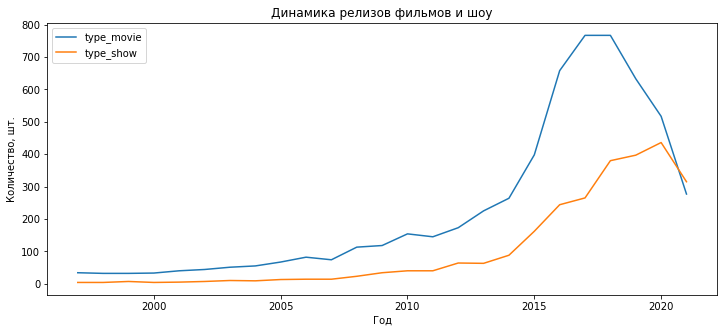

In [33]:
for types in movie_show.columns:
    plt.plot(movie_show.index, movie_show[types])
plt.title('Динамика релизов фильмов и шоу')
plt.xlabel('Год')
plt.ylabel('Количество, шт.') 
plt.legend(movie_show)

In [ ]:
# Считаю, что рост релизов связан с ростом потребностей зрителей. Спад в релизах фильмов в 2018 связываю с началом 
# финансового кризиса и далее с пандемией, отчего люди стали больше смотреть ТВ шоу у себя дома. Спад после 2020 связан с недостаточностью данных. 
 

In [53]:
# Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. 
#Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads
books = pd.read_csv('bestsellers with categories.csv', sep=',')
books_ = books.drop_duplicates(subset='Name', keep='first') # Почистил от дубликатов
books_

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


<AxesSubplot:title={'center':'Корреляция между ценой книги и количеством обзоров'}, xlabel='Price', ylabel='Reviews'>

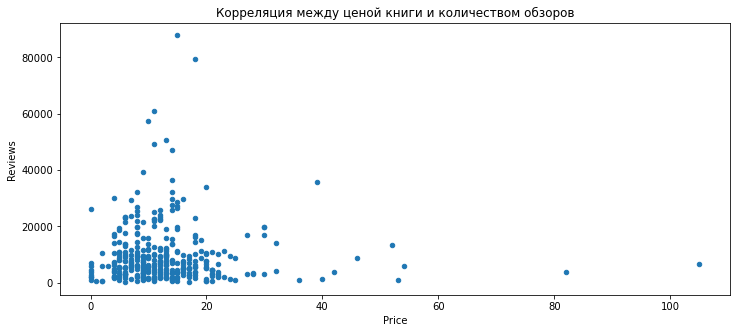

In [35]:
books_.plot(kind='scatter', 
        x='Price', 
        y='Reviews', 
        title='Корреляция между ценой книги и количеством обзоров')

In [ ]:
# Подавляющее количество отзывов оставлено на книги ценой до 20 долларов

<AxesSubplot:xlabel='User Rating', ylabel='Price'>

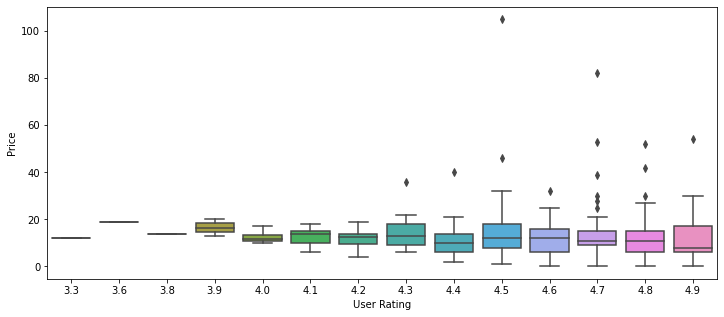

In [54]:
sns.boxplot(x='User Rating', y="Price", data=books_)

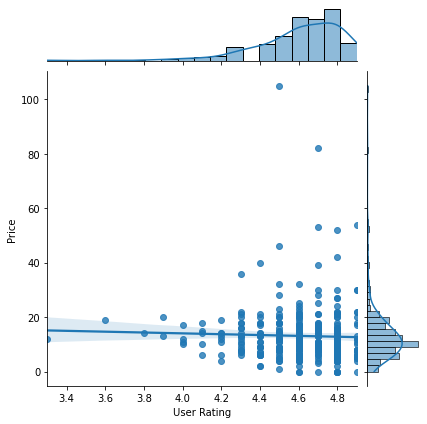

In [55]:
# Смотрим как связаны между собой цена книг и оценка
sns.jointplot(x='User Rating', y="Price", data=books_, kind='reg')